- author: Macrina Lobo

In [1]:
library(ArchR)

#set threads to 1/2 of available cores (assuming each core has 2 threads)
addArchRThreads(threads = 8)

#set genome
addArchRGenome("mm10")

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [2]:
R.Version()

$platform
[1] "x86_64-apple-darwin15.6.0"

$arch
[1] "x86_64"

$os
[1] "darwin15.6.0"

$system
[1] "x86_64, darwin15.6.0"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.3"

$year
[1] "2020"

$month
[1] "02"

$day
[1] "29"

$`svn rev`
[1] "77875"

$language
[1] "R"

$version.string
[1] "R version 3.6.3 (2020-02-29)"

$nickname
[1] "Holding the Windsock"

In [3]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Catalina 10.15.5

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ArchR_1.0.1                 magrittr_2.0.1             
 [3] rhdf5_2.30.1                Matrix_1.3-4               
 [5] data.table_1.14.0           SummarizedExperiment_1.16.1
 [7] DelayedArray_0.12.3         BiocParallel_1.20.1        
 [9] matrixStats_0.59.0          Biobase_2.46.0             
[11] GenomicRanges_1.38.0        GenomeInfoDb_1.22.1        
[13] IRanges_2.20.2              S4Vectors_0.24.4           
[15] BiocGenerics_0.32.0         ggplot2_3.

In [4]:
setwd("/Users/LoboM/Documents/e11_12_analysis/")

In [5]:
meta_list <- read.csv('Fig2/samples.csv', stringsAsFactors = F)
file.list = meta_list$fragment_location
sample.list = meta_list$sample_name

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'Fig2/samples.csv'”


In [6]:
file.list

[1] "~/Dropbox/shared_Bioinformatics/tenX/scATACseq/2018NOV_10xATAC/fragments.tsv.gz"                         
[2] "~/Dropbox/2019MAY17scATACcount/E11_5_scATAC_rep2/outs/fragments.tsv.gz"                                  
[3] "~/Dropbox/shared_Bioinformatics/tenX/scATACseq/2019JAN03_10xATAC/E12_5_scATAC_rep1/outs/fragments.tsv.gz"
[4] "~/Dropbox/shared_Bioinformatics/tenX/scATACseq/2019JAN03_10xATAC/E12_5_scATAC_rep2/outs/fragments.tsv.gz"

In [7]:
sample.list

[1] "e11_5rep1" "e11_5rep2" "e12_5rep1" "e12_5rep2"

In [8]:
ArrowFiles <- createArrowFiles(
  inputFiles = file.list,
  sampleNames = sample.list,
  minTSS = 4, 
  minFrags = 3000, 
  addTileMat = TRUE,
  addGeneScoreMat = TRUE
)

Using GeneAnnotation set by addArchRGenome(Mm10)!

Using GeneAnnotation set by addArchRGenome(Mm10)!

ArchR logging to : ArchRLogs/ArchR-createArrows-aa655f73be39-Date-2021-07-29_Time-09-37-38.log
If there is an issue, please report to github with logFile!

Cleaning Temporary Files

2021-07-29 09:37:38 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-createArrows-aa655f73be39-Date-2021-07-29_Time-09-37-38.log



In [9]:
projFoxn1ko <- ArchRProject(
    ArrowFiles = ArrowFiles, 
    outputDirectory = "QC_tmp",# "ML_0409",
    copyArrows = TRUE 
)
projFoxn1ko

Using GeneAnnotation set by addArchRGenome(Mm10)!

Using GeneAnnotation set by addArchRGenome(Mm10)!

Validating Arrows...

Getting SampleNames...



Copying ArrowFiles to Ouptut Directory! If you want to save disk space set copyArrows = FALSE

1 
2 
3 
4 


Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,

class: ArchRProject 
outputDirectory: /Users/LoboM/Documents/e11_12_analysis/QC_tmp 
samples(4): e11_5rep1 e11_5rep2 e12_5rep2 e12_5rep1
sampleColData names(1): ArrowFiles
cellColData names(13): Sample TSSEnrichment ... nDiFrags BlacklistRatio
numberOfCells(1): 13953
medianTSS(1): 15.504
medianFrags(1): 26992

In [12]:
table(projFoxn1ko@cellColData$Sample)


e11_5rep1 e11_5rep2 e12_5rep1 e12_5rep2 
     4320      1273      3576      4784 

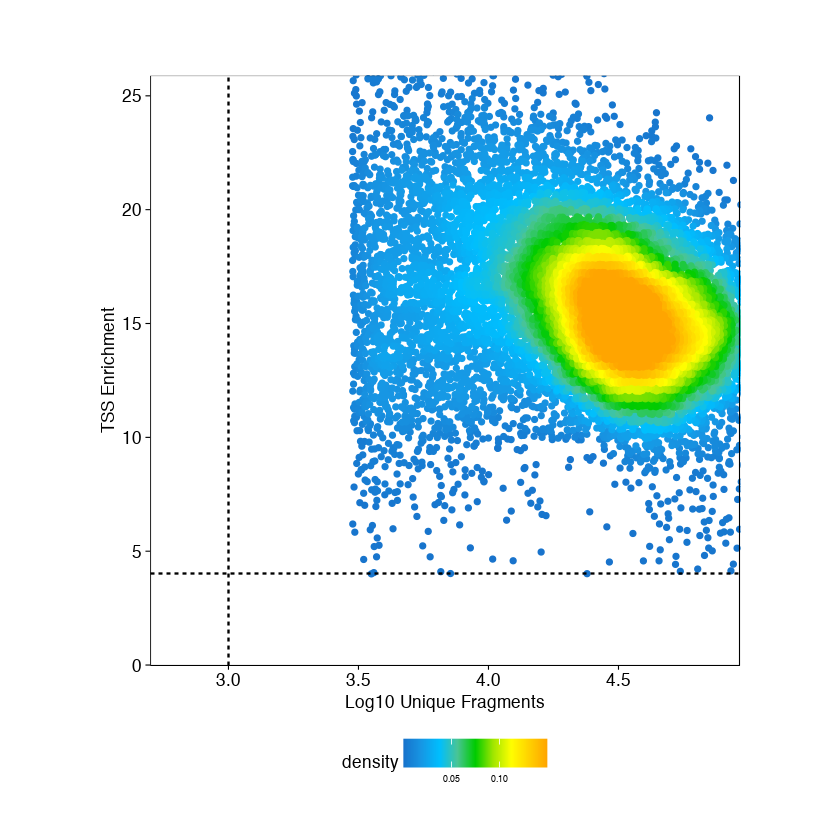

In [28]:
df <- getCellColData(projFoxn1ko2, select = c("log10(nFrags)", "TSSEnrichment"))
p <- ggPoint(
    x = df[,1], 
    y = df[,2], 
    colorDensity = TRUE,
    continuousSet = "sambaNight",
    xlabel = "Log10 Unique Fragments",
    ylabel = "TSS Enrichment",
    xlim = c(log10(500), quantile(df[,1], probs = 0.99)),
    ylim = c(0, quantile(df[,2], probs = 0.99))
) + geom_hline(yintercept = 4, lty = "dashed") + geom_vline(xintercept = 3, lty = "dashed")

p